In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
#data cleaning

#separate out the necessery regions
penguins = penguins[['Species', 'Region', 'Island','Culmen Length (mm)','Culmen Depth (mm)',
                     'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#simplify the specie names
penguins["Species"] = penguins["Species"].str.split().str.get(0)
#simplify the column names
penguins = penguins.rename(columns={'Culmen Length (mm)': 'Culmen Len', 'Culmen Depth (mm)': 'Culmen Dep',
                                   'Flipper Length (mm)': 'Flipper Len', 'Body Mass (g)': 'Mass',
                                   'Delta 15 N (o/oo)': 'Delta 15', 'Delta 13 C (o/oo)': 'Delta 13'})
#simplify the sex and reassign to the original column
record = {
    "MALE" : "M",
    "FEMALE" : "F"
}
penguins["Sex"] = penguins["Sex"].map(record)

penguins.head()

<ipython-input-2-13428e5e1177>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Species"] = penguins["Species"].str.split().str.get(0)


,Species,Region,Island,Culmen Len,Culmen Dep,Flipper Len,Mass,Sex,Delta 15,Delta 13
0,Adelie,Anvers,Torgersen,39.1,18.7,181.0,3750.0,M,NaN,NaN
1,Adelie,Anvers,Torgersen,39.5,17.4,186.0,3800.0,F,8.94956,-24.69454
2,Adelie,Anvers,Torgersen,40.3,18.0,195.0,3250.0,F,8.36821,-25.33302
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,36.7,19.3,193.0,3450.0,F,8.76651,-25.32426


In [ ]:
#Exploratory Analysis
def penguin_summary_table(group_cols, value_cols):

    summary_table = penguins.groupby(group_cols)[value_cols].mean().round(2)
    return summary_table

penguin_summary_table(["Island", "Species"], ["Culmen Len", "Culmen Dep","Mass"])

Culmen Len  Culmen Dep     Mass
Island    Species                                   
Biscoe    Adelie          38.98       18.37  3709.66
          Gentoo          47.50       14.98  5076.02
Dream     Adelie          38.50       18.25  3688.39
          Chinstrap       48.83       18.42  3733.09
Torgersen Adelie          38.95       18.43  3706.37

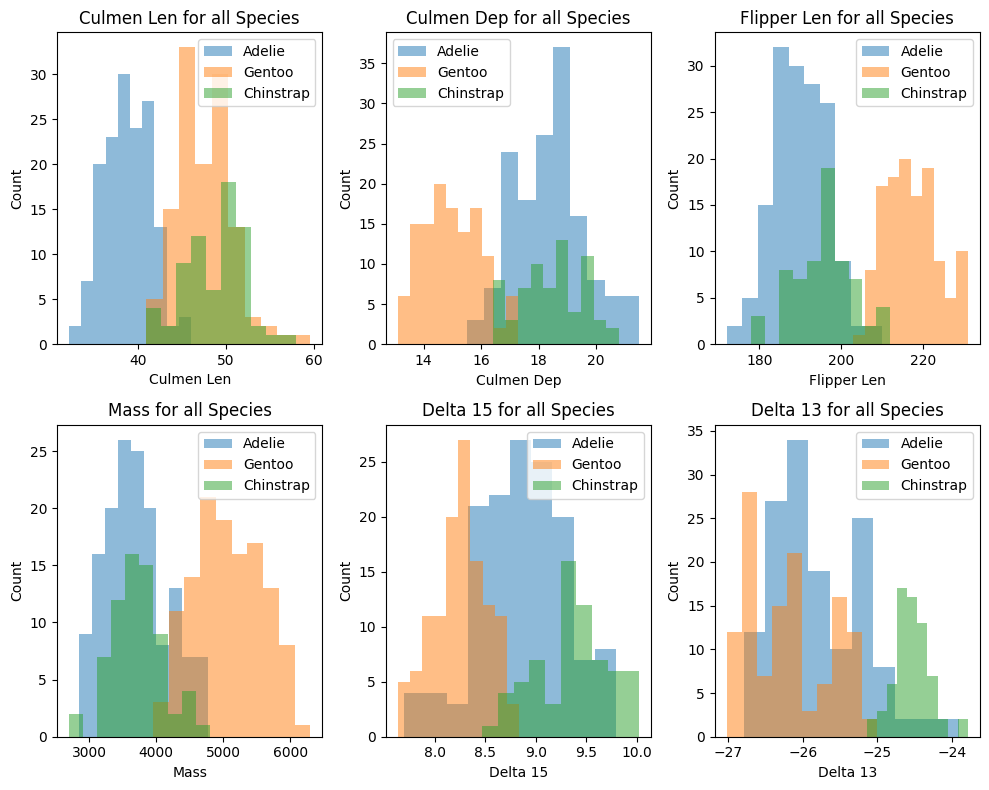

In [ ]:
def multihist(penguins, Species, categories, alpha):

    fig, axs = plt.subplots(2,3, figsize=(10,8))
    axs = axs.flatten()
    for i, category in enumerate(categories):
        for specie in Species:
            subspecies = penguins[penguins['Species'] == specie]
            axs[i].hist(subspecies[category], alpha=alpha, label=specie)

        axs[i].set_title(f"{category} for all Species")
        axs[i].set_xlabel(category)
        axs[i].set_ylabel('Count')
        axs[i].legend()

    plt.tight_layout()
    plt.show()
multihist(penguins,["Adelie","Gentoo","Chinstrap"],
             ["Culmen Len","Culmen Dep","Flipper Len","Mass","Delta 15","Delta 13"],alpha = 0.5)

Tim's Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins_forest = penguins.copy()
train, test = train_test_split(penguins_forest, test_size = 0.2)

def prep_penguins_data(df_data,target):

    df = df_data.copy()

    le = preprocessing.LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    print(f"Sex 0, 1 are {list(le.inverse_transform([0, 1]))}")

    df["Region"] = le.fit_transform(df["Region"])
    print(f"Region 0 are {list(le.inverse_transform([0]))}")

    df["Island"] = le.fit_transform(df["Island"])
    print(f"Island 0, 1, 2 are {list(le.inverse_transform([0, 1, 2]))}")

    df["Species"] = le.fit_transform(df["Species"])
    print(f"Species 0, 1, 2 are {list(le.inverse_transform([0, 1, 2]))}")

    X = df.drop([target], axis = 1)
    y = df[target]

    return(X,y)

X_train_forest, y_train_forest = prep_penguins_data(train, "Species")
X_test_forest, y_test_forest = prep_penguins_data(test,"Species")
X_train_forest.head()

Sex 0, 1 are ['F', 'M']
Region 0 are ['Anvers']
Island 0, 1, 2 are ['Biscoe', 'Dream', 'Torgersen']
Species 0, 1, 2 are ['Adelie', 'Chinstrap', 'Gentoo']
Sex 0, 1 are ['F', 'M']
Region 0 are ['Anvers']
Island 0, 1, 2 are ['Biscoe', 'Dream', 'Torgersen']
Species 0, 1, 2 are ['Adelie', 'Chinstrap', 'Gentoo']


,Region,Island,Culmen Len,Culmen Dep,Flipper Len,Mass,Sex,Delta 15,Delta 13
112,0,0,39.7,17.7,193.0,3200.0,0,9.02657,-26.06203
240,0,0,50.2,14.3,218.0,5700.0,1,7.89620,-25.37746
189,0,1,52.0,20.7,210.0,4800.0,1,9.43146,-24.68440
327,0,0,53.4,15.8,219.0,5500.0,1,8.41017,-26.33867
338,0,0,47.2,13.7,214.0,4925.0,0,7.99184,-26.20538


In [ ]:
def check_forest_score(cols, X, y, max_depth):
    """
    Evaluates the possible feastures using cross-validation
    """
    print("Training with columns " + str(cols) + " and depth " + str(max_depth))

    RF = RandomForestClassifier(max_depth = max_depth)
    return cross_val_score(RF, X[cols], y, cv = 5).mean()

In [ ]:
combos = [["Region","Culmen Len","Flipper Len"],
         ["Island","Culmen Len","Flipper Len"],
         ["Sex","Culmen Len","Delta 15"],
         ["Sex","Culmen Len","Flipper Len"]]

#checks for the optimal combination of X columns while setting depth constant
for cols in combos:
    X = check_forest_score(cols, X_train_forest, y_train_forest,3)
    print("CV score is " + str(X))

Training with columns ['Region', 'Culmen Len', 'Flipper Len'] and depth 3
CV score is 0.9460030165912519
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 3
CV score is 0.969155354449472
Training with columns ['Sex', 'Culmen Len', 'Delta 15'] and depth 3
CV score is 0.9460030165912519
Training with columns ['Sex', 'Culmen Len', 'Flipper Len'] and depth 3
CV score is 0.969155354449472


In [ ]:
#Random forest modeling
#using the features chosen from feature selection
cols_forest = ['Island', 'Culmen Len', 'Flipper Len']
X_train_forest = X_train_forest[cols_forest]
X_test_forest = X_test_forest[cols_forest]

RF = RandomForestClassifier()
max_depth_test = 10
for i in range(1,max_depth_test):
    X = check_forest_score(cols_forest, X_train_forest, y_train_forest,i)
    print("CV score is " + str(X))
#the optimal depth is 7 as shown by the loop

Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 1
CV score is 0.7799396681749622
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 2
CV score is 0.9768476621417799
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 3
CV score is 0.9768476621417799
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 4
CV score is 0.9807692307692308
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 5
CV score is 0.9807692307692306
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 6
CV score is 0.9846153846153847
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 7
CV score is 0.9846153846153847
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 8
CV score is 0.9768476621417796
Training with columns ['Island', 'Culmen Len', 'Flipper Len'] and depth 9
CV score is 0.9884615384615385


In [ ]:
RF = RandomForestClassifier(max_depth = 7)
RF.fit(X_train_forest,y_train_forest)

RandomForestClassifier(max_depth=7)

In [ ]:
#achieves over 95% accuracy most of the time
RF.score(X_test_forest,y_test_forest)

0.9692307692307692

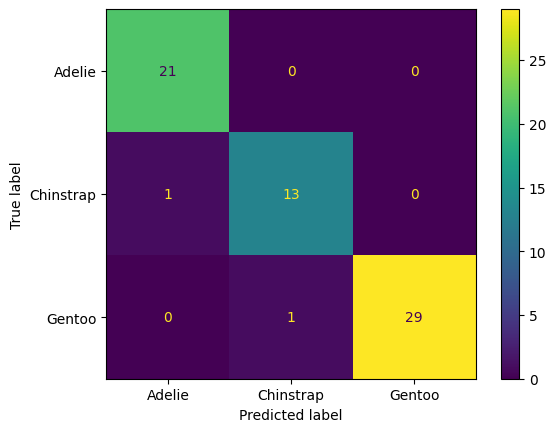

In [ ]:
#constructing confusion matrix
from sklearn import metrics
y_test_forest_predicted = RF.predict(X_test_forest)

def confusion_matrix(true_data, predicted_data):
    confusion_matrix = metrics.confusion_matrix(true_data, predicted_data)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                                display_labels = ["Adelie","Chinstrap","Gentoo"])
    cm_display.plot()
    plt.show()

confusion_matrix(y_test_forest, y_test_forest_predicted)

In [ ]:
def plot_regions(c, X, y, col_x, col_y):
    """

    """
    # for convenience, give names to the two
    # columns of the data
    x0 = X[col_x]
    x1 = X[col_y]

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col_x : XX,
        col_y  : YY
    })

    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # create the plot
    fig, ax = plt.subplots(1)

    # use contour plot to visualize the predictions
    contour_set = ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)

    # plot the data
    scatter = ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)

    ax.set(xlabel = col_x,
           ylabel = col_y)

    label_dict = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
    unique_y = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(s), linestyle='None')
                for s in [scatter.norm(value) for value in unique_y]]
    new_labels = [label_dict[value] for value in unique_y]

    ax.legend(handles, new_labels, title="Species")

In [ ]:
RF = RandomForestClassifier()
def plot_multi_region(c, X, y, col_x, col_y, qualatitative_category, qualatitative_list):

    for i in range(len(qualatitative_list)):
        X_subisland = X[X[qualatitative_category] == i]
        y_subisland = y[X[qualatitative_category] == i]

        x0 = X_subisland[[col_x,col_y]]
        y0 = y_subisland
        c.fit(x0,y0)
        plot_regions(c, x0, y0, col_x, col_y)

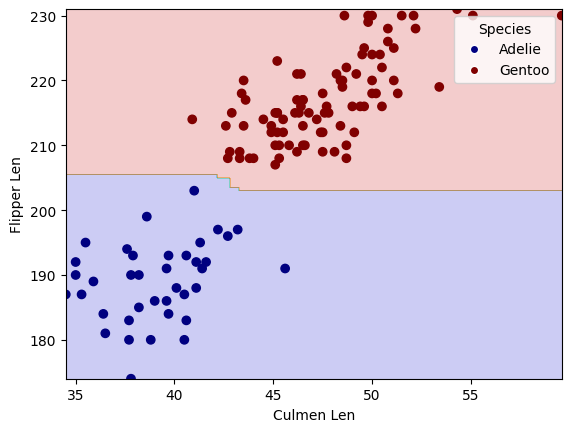

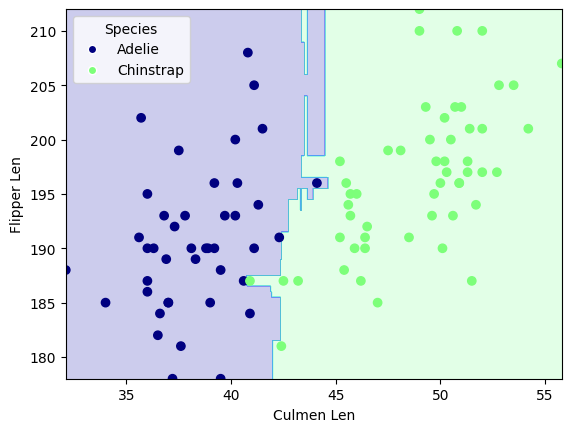

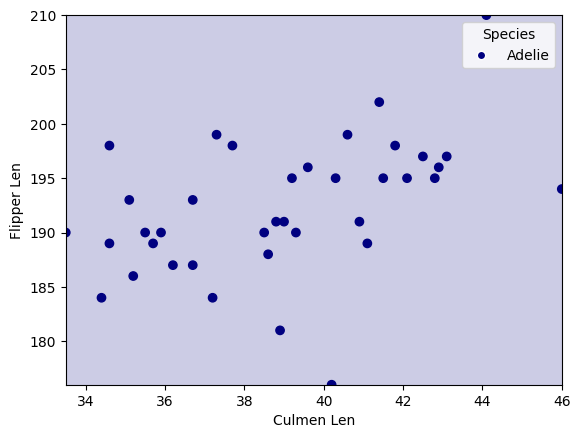

In [ ]:
plot_multi_region(RF, X_train_forest, y_train_forest, "Culmen Len", "Flipper Len",
                  "Island",['Biscoe', 'Dream', 'Torgersen'])

## Code by Yuheng

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
# Do some adjustment to our dataframe inorder to easily perform the code, not an actual data cleaning here

#before we do anything, we can use df.dropna() to get the #valid data

#separate out the necessery regions

penguins = penguins[['Species', 'Region', 'Island','Culmen Length (mm)','Culmen Depth (mm)',
                     'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#simplify the specie names
penguins["Species"] = penguins["Species"].str.split().str.get(0)
#simplify the column names
penguins = penguins.rename(columns={'Culmen Length (mm)': 'Culmen Len', 'Culmen Depth (mm)': 'Culmen Dep',
                                   'Flipper Length (mm)': 'Flipper Len', 'Body Mass (g)': 'Mass',
                                   'Delta 15 N (o/oo)': 'Delta 15', 'Delta 13 C (o/oo)': 'Delta 13'})
#simplify the sex and reassign to the original column
record = {
    "MALE" : "M",
    "FEMALE" : "F"
}
penguins["Sex"] = penguins["Sex"].map(record)

penguins

<ipython-input-18-ba0052f144a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Species"] = penguins["Species"].str.split().str.get(0)


,Species,Region,Island,Culmen Len,Culmen Dep,Flipper Len,Mass,Sex,Delta 15,Delta 13
0,Adelie,Anvers,Torgersen,39.1,18.7,181.0,3750.0,M,NaN,NaN
1,Adelie,Anvers,Torgersen,39.5,17.4,186.0,3800.0,F,8.94956,-24.69454
2,Adelie,Anvers,Torgersen,40.3,18.0,195.0,3250.0,F,8.36821,-25.33302
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,36.7,19.3,193.0,3450.0,F,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Anvers,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Anvers,Biscoe,46.8,14.3,215.0,4850.0,F,8.41151,-26.13832
341,Gentoo,Anvers,Biscoe,50.4,15.7,222.0,5750.0,M,8.30166,-26.04117
342,Gentoo,Anvers,Biscoe,45.2,14.8,212.0,5200.0,F,8.24246,-26.11969


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)
train, test = train_test_split(penguins, test_size = 0.3)
# we split the data into a training set and a test set, 30% of the data is in the test set
train.shape, test.shape

((240, 10), (104, 10))

In [ ]:
from sklearn import preprocessing

def data_clean(df_data):
    df = df_data

    le = preprocessing.LabelEncoder()

    df["Species"] = le.fit_transform(df["Species"])
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Region"] = le.fit_transform(df["Region"])
    df["Island"] = le.fit_transform(df["Island"])

     # Then we have to drop the nan value
    df = df.dropna()

    X = df.drop(["Species"], axis = 1)
    y = df["Species"]

    return(X,y)


In [ ]:
X_train, y_train = data_clean(train)
X_test, y_test = data_clean(test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((229, 9), (229,), (101, 9), (101,))

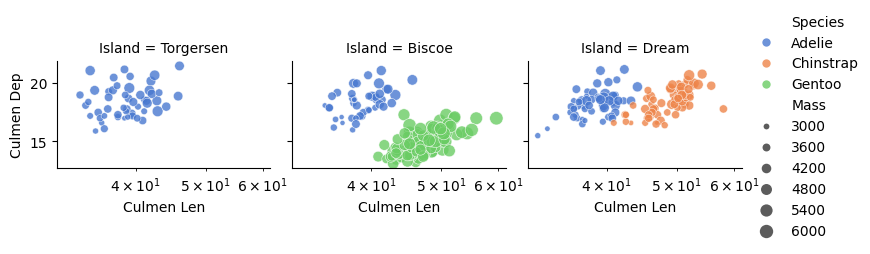

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# create a
fgrid = sns.relplot(x = "Culmen Len", y = "Culmen Dep", hue = "Species", size = "Mass",
            col = "Island", alpha = .8, sizes=(10, 100), palette = "muted",
            height = 2, aspect = 1.3, data = penguins)

fgrid.axes[0][0].semilogx();

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


def check_model_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns in cols and returns the CV score.
    """
    print("Training with columns " + str(cols))

    # calll the Naive Bayes Classifier
    gnb = GaussianNB(var_smoothing=1e-5)
    return cross_val_score(gnb, X_train[cols], y_train, cv = 5).mean()

combos = [["Region","Culmen Len","Flipper Len"],
         ["Island","Culmen Len","Flipper Len"],
         ["Sex","Culmen Len","Delta 15"],
         ["Sex","Culmen Len","Flipper Len"]]


for cols in combos:
    x = check_model_score(cols)
    print("CV score is " + str(x))


Training with columns ['Region', 'Culmen Len', 'Flipper Len']
CV score is 0.9652173913043478
Training with columns ['Island', 'Culmen Len', 'Flipper Len']
CV score is 0.9825120772946858
Training with columns ['Sex', 'Culmen Len', 'Delta 15']
CV score is 0.9476328502415459
Training with columns ['Sex', 'Culmen Len', 'Flipper Len']
CV score is 0.9652173913043478


In [ ]:
## Assign train value to our specific column
X_train = X_train[["Island","Culmen Len","Flipper Len"]]

## Assign test value to our specific column
X_test = X_test[["Island","Culmen Len","Flipper Len"]]

# check the prediction score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Score for X_test " + str(gnb.score(X_test, y_test)))


Score for X_test 0.8811881188118812


In [ ]:
def plot_regions(c, X, y, col_x, col_y):
    """

    """
    # for convenience, give names to the two
    # columns of the data
    x0 = X[col_x]
    x1 = X[col_y]

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col_x : XX,
        col_y  : YY
    })

    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # create the plot
    fig, ax = plt.subplots(1)

    # use contour plot to visualize the predictions
    contour_set = ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)

    # plot the data
    scatter = ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)

    ax.set(xlabel = col_x,
           ylabel = col_y)

    label_dict = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
    unique_y = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(s), linestyle='None')
                for s in [scatter.norm(value) for value in unique_y]]
    new_labels = [label_dict[value] for value in unique_y]

    ax.legend(handles, new_labels, title="Species")

In [ ]:

def plot_multi_region(c, X, y, col_x, col_y, qualatitative_category, qualatitative_list):

    for i in range(len(qualatitative_list)):
        X_subisland = X[X[qualatitative_category] == i]
        y_subisland = y[X[qualatitative_category] == i]

        x0 = X_subisland[[col_x,col_y]]
        y0 = y_subisland
        gnb.fit(x0,y0)
        plot_regions(c, x0, y0, col_x, col_y)

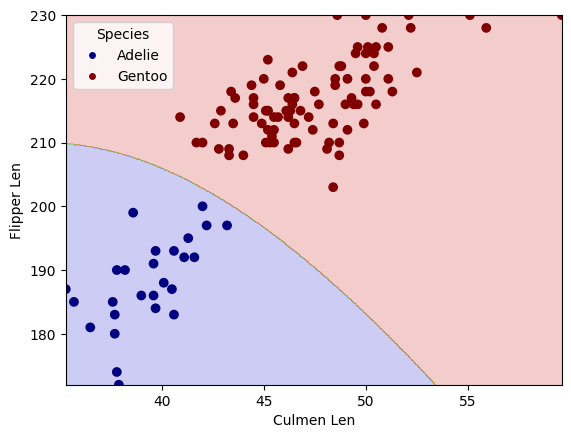

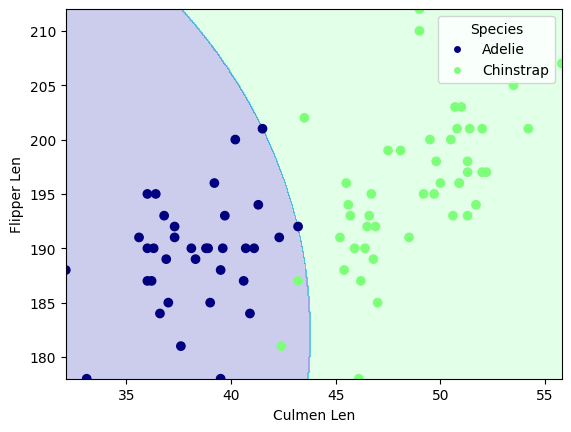

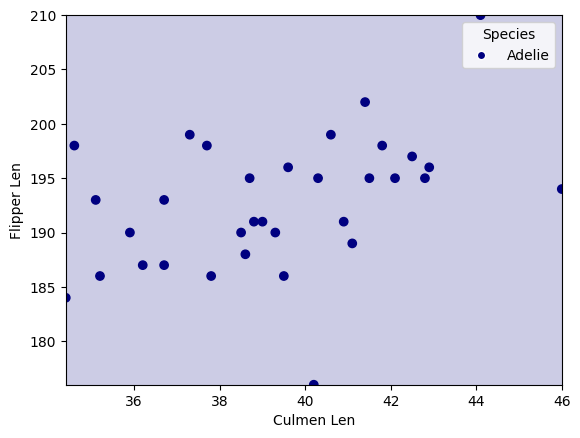

In [ ]:
gnb = GaussianNB()
plot_multi_region(gnb, X_train, y_train, "Culmen Len", "Flipper Len",
                  "Island",['Biscoe', 'Dream', 'Torgersen'])

# Cassidy's Code


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
#separate out the necessery regions

penguins = penguins[['Species', 'Region', 'Island','Culmen Length (mm)','Culmen Depth (mm)',
                     'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#simplify the specie names
penguins["Species"] = penguins["Species"].str.split().str.get(0)
#simplify the column names
penguins = penguins.rename(columns={'Culmen Length (mm)': 'Culmen Len', 'Culmen Depth (mm)': 'Culmen Dep',
                                   'Flipper Length (mm)': 'Flipper Len', 'Body Mass (g)': 'Mass',
                                   'Delta 15 N (o/oo)': 'Delta 15', 'Delta 13 C (o/oo)': 'Delta 13'})

#simplify the sex and reassign to the original column
record = {
    "MALE" : "M",
    "FEMALE" : "F"
}
penguins["Sex"] = penguins["Sex"].map(record)

penguins.head()

<ipython-input-29-4379831934cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Species"] = penguins["Species"].str.split().str.get(0)


,Species,Region,Island,Culmen Len,Culmen Dep,Flipper Len,Mass,Sex,Delta 15,Delta 13
0,Adelie,Anvers,Torgersen,39.1,18.7,181.0,3750.0,M,NaN,NaN
1,Adelie,Anvers,Torgersen,39.5,17.4,186.0,3800.0,F,8.94956,-24.69454
2,Adelie,Anvers,Torgersen,40.3,18.0,195.0,3250.0,F,8.36821,-25.33302
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,36.7,19.3,193.0,3450.0,F,8.76651,-25.32426


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)
train, test = train_test_split(penguins, test_size = 0.3)
# split the data into a training set and a test set; 30% of the data is in the test set
train.shape, test.shape

((240, 10), (104, 10))

In [ ]:
# clean up
from sklearn import preprocessing

def data_clean(df_data):
    df = df_data

    le = preprocessing.LabelEncoder()

    df["Species"] = le.fit_transform(df["Species"])
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Region"] = le.fit_transform(df["Region"])
    df["Island"] = le.fit_transform(df["Island"])

     # Then we have to drop the nan value
    df = df.dropna()

    X = df.drop(["Species"], axis = 1)
    y = df["Species"]

    return(X,y)

In [ ]:
X_train, y_train = data_clean(train)
X_test, y_test = data_clean(test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((229, 9), (229,), (101, 9), (101,))

Exploratory Analysis

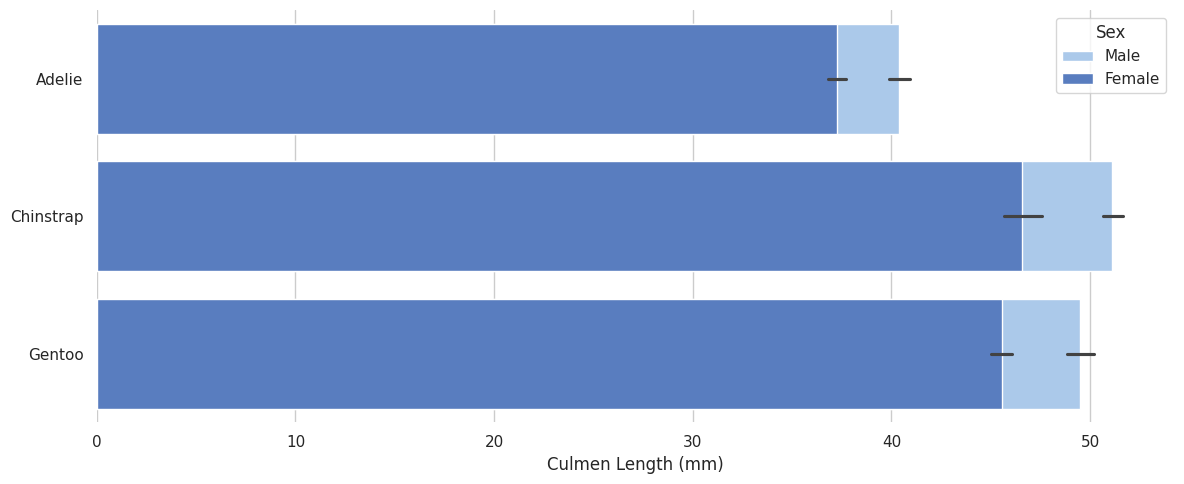

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color themes
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

# Set and initialize matplotlib size
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the culmen length for males
sns.set_color_codes("pastel")
sns.barplot(x="Culmen Len", y="Species", data=penguins[penguins['Sex'] == 'M'],
            label="Male", color="b", orient='h')

# Plot the culmen length for females
sns.set_color_codes("muted")
sns.barplot(x="Culmen Len", y="Species", data=penguins[penguins['Sex'] == 'F'],
            label="Female", color="b", orient='h')

# Add legend and axis labels
ax.legend(title="Sex")
ax.set(ylabel="", xlabel="Culmen Length (mm)")
sns.despine(left=True, bottom=True)

# adjust fit and display
plt.tight_layout()
plt.show()

Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_col_LR_scores(cols):

    print("Training with columns " + str(cols))

    LR = LogisticRegression()
    return(cross_val_score(LR, X_train[cols], y_train, cv = 5).mean())

combos = [["Sex", "Culmen Len", "Culmen Dep"],
         ["Region", "Mass", "Culmen Len"],
         ["Mass", "Sex", "Region", "Delta 15", "Delta 13"],
         ["Region", "Mass", "Culmen Dep"],
         ["Sex", "Culmen Len", "Flipper Len"]]

for cols in combos:
    x = check_col_LR_scores(cols)
    print("CV score is " + str(x) + "\n")

Training with columns ['Sex', 'Culmen Len', 'Culmen Dep']


NameError: name 'X_train' is not defined

In [ ]:
def test_col_score(cols):
    """
    Trains and evaluates a model on the test set using cols and returns the score on the test set.
    """
    print("Testing with columns " + str(cols))
    LR = LogisticRegression()
    LR.fit(X_train[cols], y_train)
    return LR.score(X_test[cols], y_test)

for cols in combos:
    x = test_col_score(cols)
    print("The test score is " + str(x) +"\n")

NameError: name 'combos' is not defined

In [ ]:
## Assign train value to our specific column
X_train = X_train[["Sex","Culmen Len","Culmen Dep"]]

## Assign test value to our specific column
X_test = X_test[["Sex","Culmen Len","Culmen Dep"]]

In [ ]:
def plot_regions(c, X, y, col_x, col_y):
    """

    """
    # for convenience, give names to the two
    # columns of the data
    x0 = X[col_x]
    x1 = X[col_y]

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col_x : XX,
        col_y  : YY
    })

    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # create the plot
    fig, ax = plt.subplots(1)

    # use contour plot to visualize the predictions
    contour_set = ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)

    # plot the data
    scatter = ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)

    ax.set(xlabel = col_x,
           ylabel = col_y)

    label_dict = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
    unique_y = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(s), linestyle='None')
                for s in [scatter.norm(value) for value in unique_y]]
    new_labels = [label_dict[value] for value in unique_y]

    ax.legend(handles, new_labels, title="Species")


In [ ]:
def plot_multi_region(c, X, y, col_x, col_y, qualatitative_category, qualatitative_list):

    for i in range(len(qualatitative_list)):
        X_subisland = X[X[qualatitative_category] == i]
        y_subisland = y[X[qualatitative_category] == i]

        x0 = X_subisland[[col_x,col_y]]
        y0 = y_subisland
        LR.fit(x0,y0)
        plot_regions(c, x0, y0, col_x, col_y)


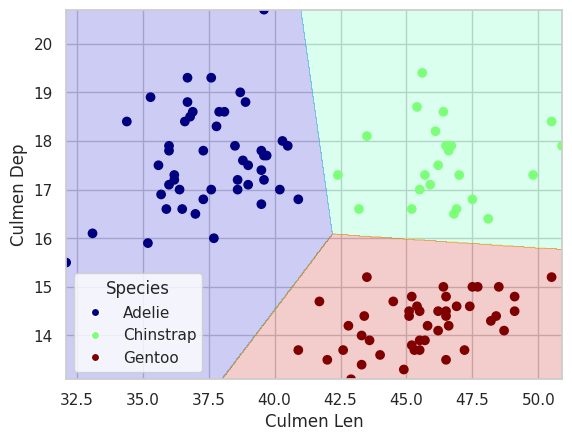

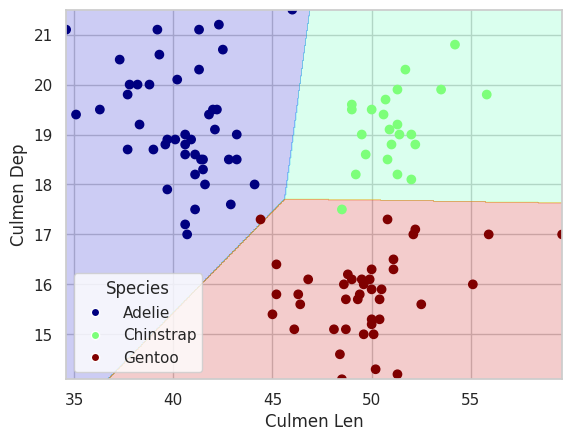

In [ ]:
LR = LogisticRegression()
plot_multi_region(LR, X_train, y_train, "Culmen Len", "Culmen Dep",
                  "Sex",['M', 'F'])